In [1]:
import dataclasses
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
@dataclasses.dataclass
class DatasetStats:
    column: str
    mean: float
    max: float
    min: float

    def plot_histogram(self, df):
        """Plots a histogram of the selected column."""
        plt.figure(figsize=(8, 5))
        df[self.column].hist(bins=20, edgecolor='black')
        plt.xlabel(self.column)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {self.column}")
        plt.grid(True)
        plt.show()

In [3]:
def load_data(filename):
    """Loads dataset into a Pandas DataFrame and cleans column names."""
    try:
        df = pd.read_csv(filename)
        df.columns = df.columns.str.strip()  # Remove extra spaces in column names
        df.rename(columns={"Price (in rupees)": "price"}, inplace=True)  # Standardize column name
        print("✅ Dataset loaded successfully!")
        print("Available Columns:", df.columns.tolist())
        return df
    except Exception as e:
        print(f" Error loading dataset: {e}")
        return None


In [4]:
def compute_stats(df, column):
    """Computes statistics for a given column and returns a DatasetStats object."""
    if column not in df.columns:
        print(f" Column '{column}' not found in dataset! Use one of: {df.columns.tolist()}")
        return None
    
    return DatasetStats(
        column=column,
        mean=df[column].mean(),
        max=df[column].max(),
        min=df[column].min()
    )


In [5]:
def dashboard(df):
    """Interactive console menu for user interaction."""
    while True:
        print("\nOptions: [stats] View Statistics | [plot] Show Histogram | [exit] Quit")
        choice = input("Enter your choice: ").strip().lower()
        
        if choice == "stats":
            column = input("Enter column name for stats: ").strip()
            stats = compute_stats(df, column)
            if stats:
                print(f"\nStatistics for '{column}':")
                print(f"Mean: {stats.mean}")
                print(f"Max: {stats.max}")
                print(f"Min: {stats.min}")
        
        elif choice == "plot":
            column = input("Enter column name for histogram: ").strip()
            stats = compute_stats(df, column)
            if stats:
                stats.plot_histogram(df)
        
        elif choice == "exit":
            print("Exiting dashboard. Goodbye!")
            break
        
        else:
            ("invalid")

✅ Dataset loaded successfully!
Available Columns: ['Index', 'Title', 'Description', 'Amount(in rupees)', 'price', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']

Options: [stats] View Statistics | [plot] Show Histogram | [exit] Quit


Enter your choice:  stats
Enter column name for stats:  price



Statistics for 'price':
Mean: 7583.771884897507
Max: 6700000.0
Min: 0.0

Options: [stats] View Statistics | [plot] Show Histogram | [exit] Quit


Enter your choice:  plot
Enter column name for histogram:  price


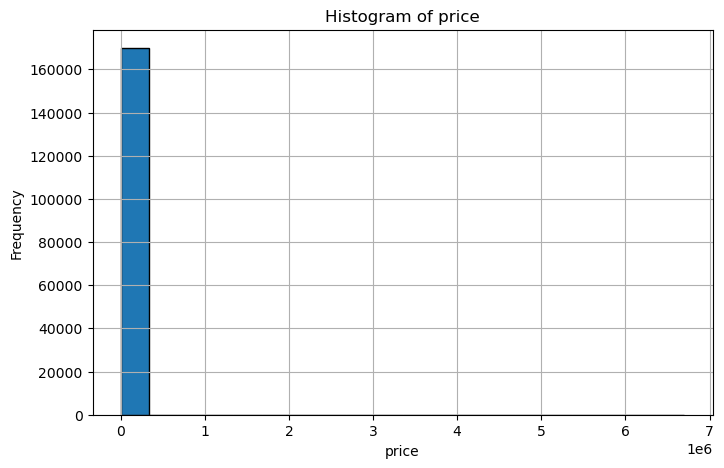


Options: [stats] View Statistics | [plot] Show Histogram | [exit] Quit


Enter your choice:  exit


Exiting dashboard. Goodbye!


In [6]:
df = load_data("house_prices.csv")  # Replace with actual dataset file
if df is not None:
    dashboard(df)